In [1]:
import data_loader
import numpy as np
import image_util
import matplotlib.pyplot as plt
import core

train_mat = data_loader.get_identity_train_matrix()
train_labels = data_loader.get_identity_train_labels()
test_mat = data_loader.get_identity_test_matrix()
test_labels = data_loader.get_identity_test_labels()
DPI = 120
IMG_PATH_PREFIX = 'writeup/images/'

# Plot the people to classify

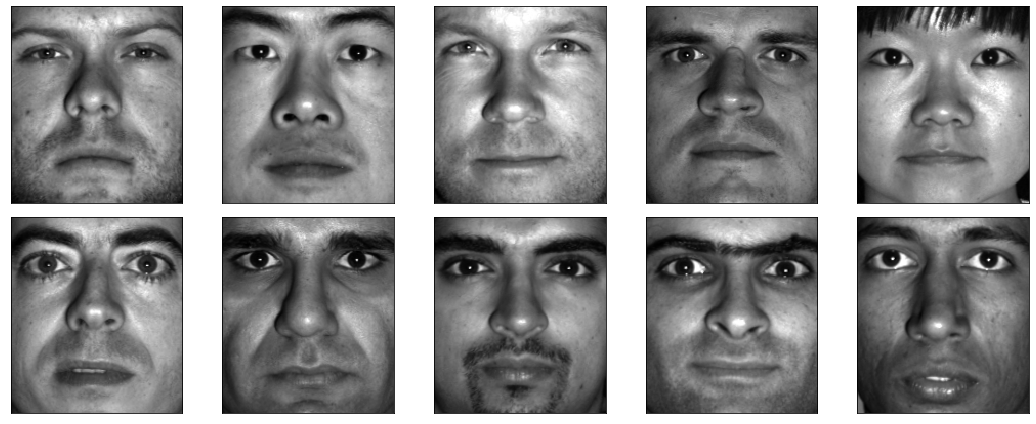

In [2]:
NUM_PEOPLE = len(data_loader.IDENTITY_PERSON_IDS)
ncols = NUM_PEOPLE//2
fig, axes = plt.subplots(nrows=2, ncols=ncols, figsize=(ncols * 3, 6))

for i in range(NUM_PEOPLE):
  r = i // ncols
  c = i % ncols
  ax = axes[r][c]
  # This assumes the first few train matrix columns are all the different people.
  img_vec = train_mat[:,i]
  image_util.show_image(ax, image_util.vector_to_img(img_vec, data_loader.CROPPED_IMG_SHAPE))

fig.tight_layout()
fig.savefig(IMG_PATH_PREFIX + 'face_samples.png', format='png', dpi=DPI)

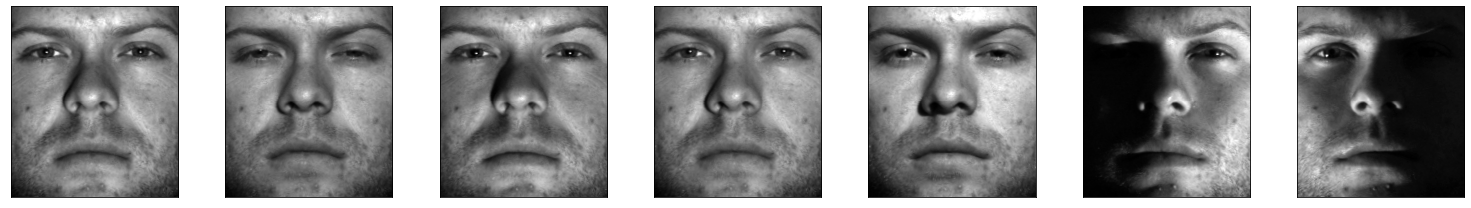

In [3]:
num_samples = 7
fig, axes = plt.subplots(nrows=1, ncols=num_samples, figsize=(21,3))
for col in range(num_samples):
  # This assumes the first few train matrix columns are all the different people.
  img_vec = train_mat[:,col * NUM_PEOPLE]
  image_util.show_image(axes[col], image_util.vector_to_img(img_vec, data_loader.CROPPED_IMG_SHAPE))
fig.tight_layout()
fig.savefig(IMG_PATH_PREFIX + 'face_trainsamples.png', format='png', dpi=DPI)

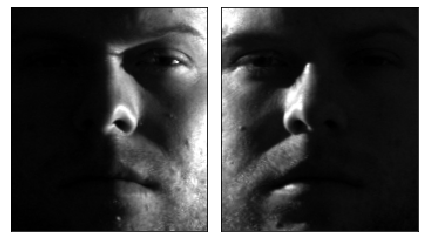

In [4]:
num_samples = 2
fig, axes = plt.subplots(nrows=1, ncols=num_samples)
for col in range(num_samples):
  # This assumes the first few train matrix columns are all the different people.
  img_vec = test_mat[:,col * NUM_PEOPLE]
  image_util.show_image(axes[col], image_util.vector_to_img(img_vec, data_loader.CROPPED_IMG_SHAPE))
fig.tight_layout()
fig.savefig(IMG_PATH_PREFIX + 'face_testsamples.png', format='png', dpi=DPI)

# SVM cross-validation and test

In [5]:
from sklearn.svm import SVC
for kernel in ['linear']:
  for C in [0.1, 1,10,100]:
    model = SVC(kernel = kernel, C = C)
    print(f"Kernel = {kernel}, C = {C}, Accuracy = {core.get_kfold_accuracy(model, train_mat, train_labels)}")

Kernel = linear, C = 0.1, Accuracy = 0.7143719806763285
Kernel = linear, C = 1, Accuracy = 0.7143719806763285
Kernel = linear, C = 10, Accuracy = 0.7143719806763285
Kernel = linear, C = 100, Accuracy = 0.7143719806763285


In [6]:
from sklearn.metrics import f1_score
best_svm = SVC(kernel = 'linear')
best_svm.fit(train_mat.T, train_labels)
train_preds = best_svm.predict(train_mat.T)
train_acc = np.sum(train_labels == train_preds) / len(train_labels)
print(f"Train acc = {train_acc}")
test_preds = best_svm.predict(test_mat.T)
test_acc = np.sum(test_labels == test_preds) / len(test_labels)
print(f"Test acc = {test_acc}")

# Perhaps not 1.0 because kfold splits into: both bright and not bright.

Train acc = 1.0
Test acc = 0.3


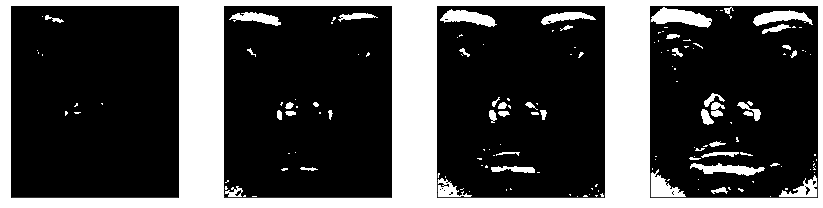

In [16]:
fig, axes = plt.subplots(nrows=1, ncols = 4, figsize = (12, 3))
for i, num_pixels_to_plot in enumerate([100,1000,2000,4000]):
  important_pixel_indices = np.argsort(np.abs(best_svm.coef_[0]))[::-1][:num_pixels_to_plot]
  important_pixels = np.zeros(data_loader.CROPPED_IMG_SHAPE)
  for pixel_index in important_pixel_indices:
    r = pixel_index // data_loader.CROPPED_IMG_SHAPE[1]
    c = pixel_index % data_loader.CROPPED_IMG_SHAPE[1]
    important_pixels[r,c] = 1
  image_util.show_image(axes[i], important_pixels)

fig.tight_layout()
fig.savefig(IMG_PATH_PREFIX + 'face_importance.png', format='png', dpi=DPI)

# KNN cross validation and test

In [8]:
from sklearn.neighbors import KNeighborsClassifier
for n_neighbors in [1,3,5,7,9]:
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  print(f"n_neighbors = {n_neighbors}, acc = {core.get_kfold_accuracy(model, train_mat, train_labels)}")
  

n_neighbors = 1, acc = 0.6708937198067632
n_neighbors = 3, acc = 0.6419082125603864
n_neighbors = 5, acc = 0.5996376811594203
n_neighbors = 7, acc = 0.5422705314009663
n_neighbors = 9, acc = 0.3991545893719806


In [9]:
best_knn = KNeighborsClassifier(n_neighbors=1)
best_knn.fit(train_mat.T, train_labels)
train_preds = best_knn.predict(train_mat.T)
train_acc = np.sum(train_labels == train_preds) / len(train_labels)
print(f"Train acc = {train_acc}")
test_preds = best_knn.predict(test_mat.T)
test_acc = np.sum(test_labels == test_preds) / len(test_labels)
print(f"Test acc = {test_acc}")

Train acc = 1.0
Test acc = 0.4


In [10]:
from collections import Counter
def analyze_identity_errors(labels, preds, images):
  label_to_pred_mistakes = Counter()
  for i in range(len(labels)):
    if preds[i] != labels[i]:
      label_to_pred_mistakes[labels[i], preds[i]] += 1
  print(label_to_pred_mistakes.most_common(10))
  

In [11]:
analyze_identity_errors(test_labels, test_preds, test_mat)

[((1, 4), 2), ((5, 4), 2), ((10, 7), 2), ((2, 7), 1), ((3, 7), 1), ((2, 4), 1), ((3, 4), 1), ((4, 7), 1), ((6, 8), 1)]


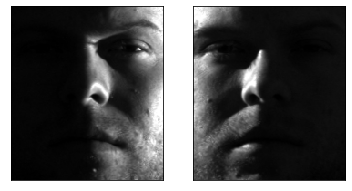

In [12]:
num_samples = 2
fig, axes = plt.subplots(nrows=1, ncols=num_samples)
for col in range(num_samples):
  # This assumes the first few train matrix columns are all the different people.
  img_vec = test_mat[:,col * NUM_PEOPLE]
  image_util.show_image(axes[col], image_util.vector_to_img(img_vec, data_loader.CROPPED_IMG_SHAPE))

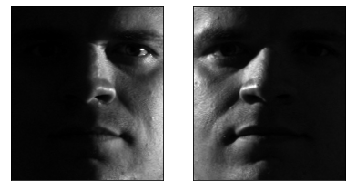

In [13]:
num_samples = 2
fig, axes = plt.subplots(nrows=1, ncols=num_samples)
for col in range(num_samples):
  # This assumes the first few train matrix columns are all the different people.
  img_vec = test_mat[:,col * NUM_PEOPLE + 3]
  image_util.show_image(axes[col], image_util.vector_to_img(img_vec, data_loader.CROPPED_IMG_SHAPE))

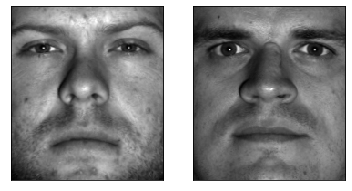

In [14]:
# Person 1 and person 4 are misrecognized the most. Perhaps it makes sense.

fig, axes = plt.subplots(nrows=1, ncols=2)
img_vec = train_mat[:,0]
image_util.show_image(axes[0], image_util.vector_to_img(img_vec, data_loader.CROPPED_IMG_SHAPE))
img_vec = train_mat[:,3]
image_util.show_image(axes[1], image_util.vector_to_img(img_vec, data_loader.CROPPED_IMG_SHAPE))

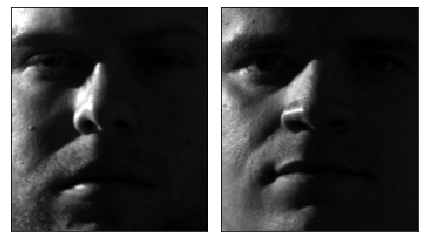

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2)
img_vec = test_mat[:,NUM_PEOPLE]
image_util.show_image(axes[0], image_util.vector_to_img(img_vec, data_loader.CROPPED_IMG_SHAPE))
img_vec = test_mat[:,NUM_PEOPLE+3]
image_util.show_image(axes[1], image_util.vector_to_img(img_vec, data_loader.CROPPED_IMG_SHAPE))
fig.tight_layout()
fig.savefig(IMG_PATH_PREFIX + 'face_difficult.png', format='png', dpi=DPI)